# The Value of a Used Car

1. The problem :

    Predicting the Value of a Used Vehicle.

2. Who might care:

    a. Individual Buyers : Whoever interested in buying a new car wonders about the actual value of the specific car with the one which was asked by the seller. So it is important for all to come to a better understanding of the values of the cars.

    b. Dealers : Most dealers would like to learn the value of that individual car, and determine its value later on.

    c. Individual Sellers : Most private sellers would need the value of their car since the value is not constant, it changes considering the depreciation, the repairs etc.

    d. Websites or Applications created to help private parties or dealers sell their vehicles.

3. Data  Set:

    a. Link of Data from Kaggle :   https://www.kaggle.com/orgesleka/used-cars-database/data
    
    b. Data Set includes 19 features and 371528 data points/observations. 

    c. The data seems raw. Has too many missing values, outliers. Also includes nonsense/ wrong entries like 9999 as year of Registration.

    d. This data includes the data points/observations from 2016. (I will search for methods to scrape data for 2017.)
    
    e. Target Feature is 'price'. Since it is the price of an individual car, it is continuous.
    
4. My approach to solve this problem:

    a. It is a supervised problem.

    b. Regression, because the dependent feature needs to be continous. However, I will combine cross-validation, GridSearch, Random Selection and etc.

    c. My target/response feature would be the value of the used cars.

    d. My independent features would be the 'name' of the car, seller type, horse power of the car, mileage, any damage or repair, gearbox (automatic or manuel), age of the car...

    e. I am thinking of dividing the data I have with 'train_test_split' feature of scikit learn.

5. What are your deliverables? Typically, this would include code, along with a paper. **

    I will complete this project on Jupiter Notebook. First I will examine data, then wrangle the data and apply ML algorithms. Hopefully I will have learned the basic concepts of data science (Wrangling, Story Telling (EDA) and ML)

    a. Data Collection

    b. Data Wrangling

    c. EDA (Exploratory Data Analysis)

    d. Modeling

    e. Presentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from datetime import datetime 
import warnings


warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

First Thing : Read your 'csv.file', explore your features.

In [2]:
df = pd.read_csv('/Users/ferideaxu/Downloads/used-cars-database/autos.csv', sep=',', header=0, encoding = "ISO-8859-1")
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [4]:
df.dateCreated = pd.to_datetime(df.dateCreated)
df['Age'] = df.dateCreated.dt.year - df.yearOfRegistration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null datetime64[ns]
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen      

In [5]:
cols = df.columns

def stat(dataf, columns):
    print("Total number of rows : ",len(dataf))
    res = []
    for col in cols:
        NumberOfNull = dataf[col].isnull().sum()
        NoOfUnique = dataf[col].nunique()
        ValueCounts = dataf[col].value_counts().sort_values(ascending=False).head(10)
        res.append((col,NumberOfNull,NoOfUnique,ValueCounts))

            
            
    metric = pd.DataFrame.from_records(res,columns=["Column","Null Count","Unique Count","Value_Counts"])
    return metric

pd.set_option('max_colwidth', 800)
stat(df,cols)


#for i,col in enumerate(cols):
#    print(str(i+1)+'. Number of Unique Values for "',col.upper(), '" :', df[col].nunique(),' out of ->',df[col].count(),'\n')
#    print(df[col].value_counts().sort_values(ascending=False).head(20),'\n')

Total number of rows :  371528


,Column,Null Count,Unique Count,Value_Counts
0,dateCrawled,0,280500,"2016-03-24 14:49:47 7 2016-03-26 22:57:31 6 2016-03-19 21:49:56 6 2016-04-02 14:50:21 5 2016-03-21 14:50:20 5 2016-03-08 15:50:29 5 2016-04-03 13:41:21 5 2016-03-29 22:50:49 5 2016-03-16 17:43:49 5 2016-03-14 16:51:53 5 Name: dateCrawled, dtype: int64"
1,name,0,233531,"Ford_Fiesta 657 BMW_318i 627 Opel_Corsa 622 Volkswagen_Golf_1.4 603 BMW_316i 523 BMW_320i 492 Volkswagen_Polo 475 Renault_Twingo 447 Volkswagen_Golf 428 Volkswagen_Golf_1.6 413 Name: name, dtype: int64"
2,seller,0,2,"privat 371525 gewerblich 3 Name: seller, dtype: int64"
3,offerType,0,2,"Angebot 371516 Gesuch 12 Name: offerType, dtype: int64"
4,price,0,5597,"0 10778 500 5670 1500 5394 1000 4649 1200 4594 2500 4438 600 3819 3500 3792 800 3784 2000 3432 Name: price, dtype: int64"
5,abtest,0,2,"test 192585 control 178943 Name: abtest, dtype: int64"
6,vehicleType,37869,8,"limousine 95894 kleinwagen 80023 kombi 67564 bus 30201 cabrio 22898 coupe 19015 suv 14707 andere 3357 Name: vehicleType, dtype: int64"
7,yearOfRegistration,0,155,"2000 24551 1999 22767 2005 22316 2006 20230 2001 20218 2003 19873 2004 19746 2002 19189 1998 17951 2007 17673 Name: yearOfRegistration, dtype: int64"
8,gearbox,20209,2,"manuell 274214 automatik 77105 Name: gearbox, dtype: int64"
9,powerPS,0,794,"0 40820 75 24035 60 15907 150 15442 140 13585 101 13313 90 12748 116 11963 170 10982 105 10429 Name: powerPS, dtype: int64"


Seller feature : 3 out of 371528 observations are dealer. So this feature can be dropped.

Offer Type feature : 12 out of 371528 observations are Gesuch. So this feature can be dropped.

Number of Pictures feature has all 0 values. So this feature can also be dropped.

PowerPS Feature : 40820 observations are 0. So this needs to be dealt with.

13 unique numbers for the 'kilometer' (mileage) exist. So we can keep them all since there is no outlier.

7 features are discrete, numbers, whereas

12 features are object (string, datetime....)

Shape of the data is 371528x20

"vehicleType, gearbox, model, fuelType, brand, notRepairedDamage" Features have missing values!!!

In [6]:
cols2 = df.columns
colsNew = [a for a in cols2 if a not in ['seller','offerType','nrOfPictures']]

for col in colsNew:
    print('Percentage of Missing Values for Feature "', col.upper(),'" :',
          round(df[col].isnull().sum()/df.shape[0],2)*100)

Percentage of Missing Values for Feature " DATECRAWLED " : 0.0
Percentage of Missing Values for Feature " NAME " : 0.0
Percentage of Missing Values for Feature " PRICE " : 0.0
Percentage of Missing Values for Feature " ABTEST " : 0.0
Percentage of Missing Values for Feature " VEHICLETYPE " : 10.0
Percentage of Missing Values for Feature " YEAROFREGISTRATION " : 0.0
Percentage of Missing Values for Feature " GEARBOX " : 5.0
Percentage of Missing Values for Feature " POWERPS " : 0.0
Percentage of Missing Values for Feature " MODEL " : 6.0
Percentage of Missing Values for Feature " KILOMETER " : 0.0
Percentage of Missing Values for Feature " MONTHOFREGISTRATION " : 0.0
Percentage of Missing Values for Feature " FUELTYPE " : 9.0
Percentage of Missing Values for Feature " BRAND " : 0.0
Percentage of Missing Values for Feature " NOTREPAIREDDAMAGE " : 19.0
Percentage of Missing Values for Feature " DATECREATED " : 0.0
Percentage of Missing Values for Feature " POSTALCODE " : 0.0
Percentage of

In [7]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,Age
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764,11.421920
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247,92.866598
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000,-7983.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000,8.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000,13.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000,17.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000,1016.000000


** As we can easily see, some nonsense data points exist 'such as' yearofRegistrain '1000', and '9999', also exist some outliers. So Data wrangling is important before applying models on the data.

In [8]:
df.describe(include=['object'])

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,lastSeen
count,371528,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528
unique,280500,233531,2,2,2,8,2,251,7,40,2,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-07 06:45:59
freq,7,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,17


As easily can be seen from the table, 2 unique values exist for 'seller, offerType, abtest, gearbox, notRepairedDamage', 8 unique values for 'vehicleType', 7 unique values for 'fuelType', 40 unique values for 'model'. Integer and DateTime features includes many different/unique data points.

----DROP THE UNNECESSARY FEATURES/COLUMNS-----

In [9]:
df = df.drop(['seller','offerType','nrOfPictures','abtest', 'monthOfRegistration'], axis=1)

Let's Wrangle the Data.

* Delete the duplicates.
* Get rid of the null/missing values
* Clean the outliers.

----- >>>>>>>>>>Delete the duplicates !!!

In [10]:
print(df.duplicated().sum())
df = df.drop_duplicates()

4


In [11]:
df = df.replace(['nein','ja','benzin','andere','elektro','manuell','automatik','kleinwagen','kombi'],
                ['no','yes','gas','other','electric','manual','automatic','smallCar','stationWagon'])
df.fuelType.unique()

array(['gas', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng', 'electric'], dtype=object)

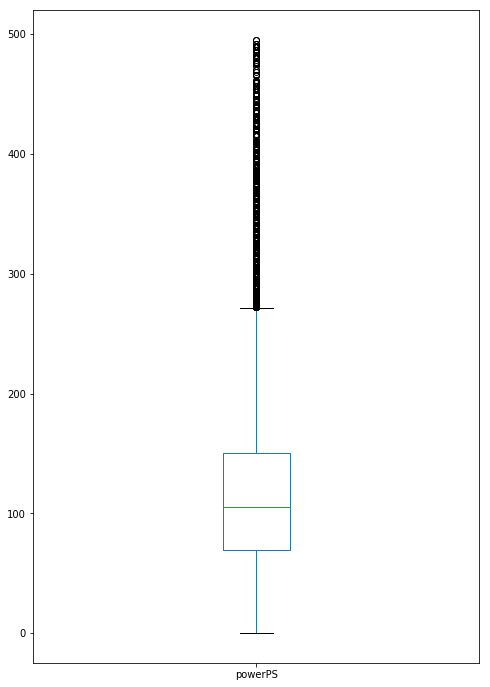

In [12]:
plt.subplots(figsize=(8,12))
df.powerPS[df.powerPS < 500].plot(kind='box')

In [13]:
df[df.powerPS > 600].head(20)
(df.powerPS > 600).sum()
(df.powerPS < 1).sum()

df[(df.powerPS < 10) & (df.powerPS > 0)].head(10)

,dateCrawled,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,Age
446,2016-03-20 20:45:27,Microcar_MC1,3950,smallCar,2004,automatic,5,NaN,70000,diesel,sonstige_autos,no,2016-03-20,90562,2016-04-03 04:17:08,12
3508,2016-03-29 17:37:58,VW_polo__TDI,1990,smallCar,2004,NaN,7,polo,150000,diesel,volkswagen,no,2016-03-29,37124,2016-04-02 05:16:40,12
10040,2016-04-04 07:58:34,Audi_A4_2009,9000,limousine,2009,manual,2,a4,5000,diesel,audi,NaN,2016-04-04,12045,2016-04-06 10:17:01,7
13367,2016-03-24 16:38:53,Microcar_Virgo_3,2850,smallCar,2005,automatic,5,NaN,40000,diesel,sonstige_autos,no,2016-03-24,56825,2016-04-07 08:44:59,11
17034,2016-04-02 22:47:03,Microcar_MC2,2500,smallCar,2006,automatic,5,NaN,40000,diesel,sonstige_autos,yes,2016-04-02,78532,2016-04-04 21:17:01,10
17043,2016-03-08 17:56:37,Elektroauto_City_EL,4500,other,2006,automatic,5,NaN,40000,electric,sonstige_autos,no,2016-03-08,77855,2016-04-07 08:46:28,10
17341,2016-03-26 10:48:50,AIXAM__MEGA_Multitruck,4600,other,2012,manual,4,NaN,20000,diesel,sonstige_autos,no,2016-03-26,40822,2016-03-26 10:48:50,4
21205,2016-03-17 22:48:49,Klima_Aus_2Te_Hand_Winter+Sommerreifen_Auf_Alu_Sehr_Gute_Zustand.,4999,limousine,2003,manual,1,e_klasse,150000,diesel,mercedes_benz,NaN,2016-03-17,66571,2016-03-17 23:44:50,13
21484,2016-03-28 14:56:39,Aixam_400_SL,5200,smallCar,1998,automatic,5,NaN,40000,diesel,sonstige_autos,NaN,2016-03-28,84085,2016-04-04 18:15:43,18
22515,2016-03-11 08:51:45,Andere_Andere,2900,smallCar,2001,automatic,5,NaN,20000,diesel,sonstige_autos,no,2016-03-11,53501,2016-04-06 06:46:24,15


#### Cars which have higher HP than 600 and lower HP than 5 should be added to the website by mistake. So this feature should be filtered.

Number of Cars with newer entries than 2016 : 14680
Number of Cars with older entries than 1970 : 1739


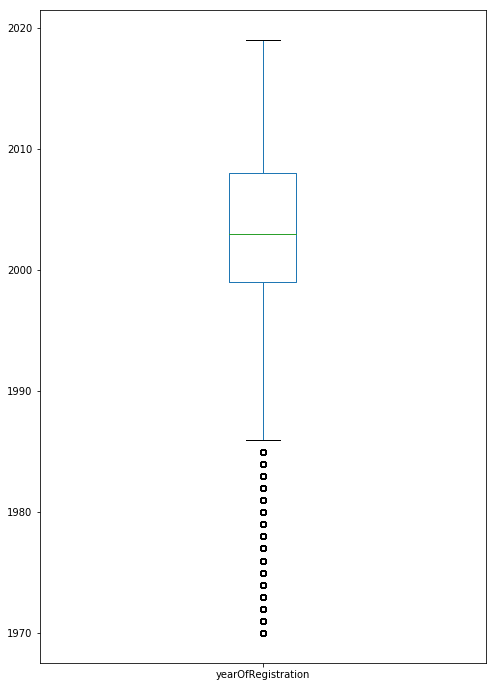

In [14]:
plt.subplots(figsize=(8,12))
df.yearOfRegistration[(df.yearOfRegistration <= 2020) & (df.yearOfRegistration >= 1970)].plot(kind='box')
print('Number of Cars with newer entries than 2016 :',(df.yearOfRegistration > 2016).sum())
print('Number of Cars with older entries than 1970 :',(df.yearOfRegistration < 1970).sum())

### Cars with a registration date newer than 2016 and older than 1970 could be deleted. There are only 1739 old cars and 14680 cars with a wrong new entry.

In [15]:
print('Number of Cars with a Value higher than 100.000 :',(df.price > 100000).sum())
print('Number of Cars with a Value lower than 250 and equal to 0 :', (df.price < 250).sum(),'and', (df.price == 0).sum())

Number of Cars with a Value higher than 100.000 : 403
Number of Cars with a Value lower than 250 and equal to 0 : 19999 and 10778


### There are 10778 cars with a Value of '0'. So we can assume that these cars are free of charge as a gift, or a wrong entry. This number is high. Should be resolved.

#### There are 403 cars with a value of higher than $100.000. This number is low enough to be underestimated.

### CLEAN THE OUTLIERS!!!!

In [16]:
yearsBool = ((df.yearOfRegistration <= 2016) & (df.yearOfRegistration >= 1970))

priceBool = (df.price <= 100000)

powerBool = ((df.powerPS <= 600) & (df.powerPS >= 5))

dfNoOutlier = df[yearsBool & priceBool & powerBool]

In [17]:
print('Data for Analysis : {}'.format(100 * (dfNoOutlier.shape[0] / df.shape[0])))

Data for Analysis : 85.57159160646418


### GET RID OF NULL/MISSING VALUES

In [18]:
dfNoOutlier.isnull().sum()

dateCrawled               0
name                      0
price                     0
vehicleType           12091
yearOfRegistration        0
gearbox                5808
powerPS                   0
model                 12217
kilometer                 0
fuelType              16872
brand                     0
notRepairedDamage     45719
dateCreated               0
postalCode                0
lastSeen                  0
Age                       0
dtype: int64

In [19]:
dfDropped = df.dropna()
df.shape[0],dfDropped.shape[0]
print('Percentage of Total Missing Values When Dropped : ',round((df.shape[0] -dfDropped.shape[0])/df.shape[0],2)*100)

Percentage of Total Missing Values When Dropped :  30.0


In [20]:
dfout = dfNoOutlier.dropna()
dfout.shape

(250160, 16)

### DATA STORYTELLING

### Explaratory Data Analysis - Visualization

In [21]:
dfout.describe(include='all')

,dateCrawled,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,Age
count,250160,250160,250160.000000,250160,250160.00000,250160,250160.000000,250160,250160.000000,250160,250160,250160,250160,250160.000000,250160,250160.000000
unique,206401,142619,NaN,8,NaN,2,NaN,250,NaN,7,39,2,107,NaN,131193,NaN
top,2016-03-24 14:49:47,BMW_318i,NaN,limousine,NaN,manual,NaN,golf,NaN,gas,volkswagen,no,2016-04-03 00:00:00,NaN,2016-04-07 06:45:59,NaN
freq,5,616,NaN,73701,NaN,191497,NaN,20442,NaN,161205,52418,224617,9943,NaN,16,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-20 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-07 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,6678.208015,NaN,2003.53477,NaN,129.076095,NaN,123967.600736,NaN,NaN,NaN,NaN,52036.345707,NaN,12.465134
std,NaN,NaN,7946.937044,NaN,6.12195,NaN,61.269366,NaN,39736.896108,NaN,NaN,NaN,NaN,25838.235011,NaN,6.121997
min,NaN,NaN,0.000000,NaN,1970.00000,NaN,5.000000,NaN,5000.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,0.000000
25%,NaN,NaN,1600.000000,NaN,2000.00000,NaN,86.000000,NaN,100000.000000,NaN,NaN,NaN,NaN,31535.000000,NaN,8.000000


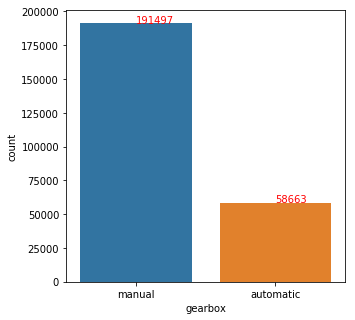

In [22]:
plt.subplots(figsize=(5,5))
ax = sns.countplot(x='gearbox',data=dfout)

for i, v in dfout.gearbox.value_counts().reset_index().iterrows():
    ax.text(i,v.gearbox,v.gearbox,color='red',fontsize=10)

#### Manual Cars are more pravalent in Europe.

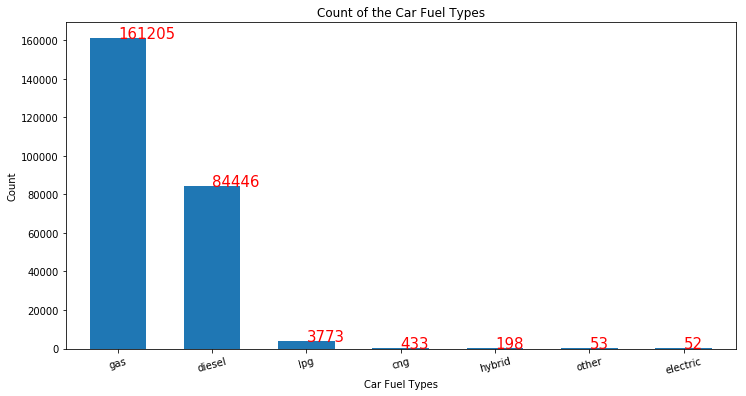

In [23]:
plt.subplots(figsize=[12,6])
ax=dfout.fuelType.value_counts().plot.bar(width=0.6)
#sns.countplot(x='fuelType',data=dfout)
plt.xticks(rotation=15)

for i, v in dfout.fuelType.value_counts().reset_index().iterrows():
    ax.text(i,v.fuelType,v.fuelType,color='red',fontsize=15)
    
plt.xlabel('Car Fuel Types')
plt.ylabel('Count')
plt.title('Count of the Car Fuel Types')
plt.show()

#### Unlike US, 2 new Fuel Type ('lpg' and 'cng') come to our attention. Since the price of the gas and diesel is too expensive, some people tend to own these kind of cars. But the numbers are low. The most common cars are run with gas and diesel.

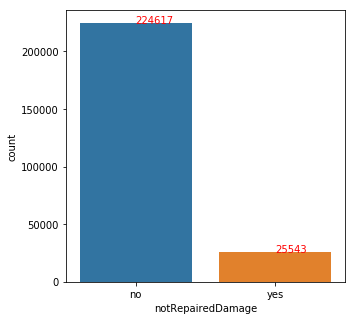

In [24]:
plt.subplots(figsize=(5,5))
ax=sns.countplot(x='notRepairedDamage',data=dfout)

for i, v in dfout.notRepairedDamage.value_counts().reset_index().iterrows():
    ax.text(i,v.notRepairedDamage,v.notRepairedDamage,color='red',fontsize=10)

#### The number of cars with no record of accidents seems to be more than the one with accidents. This information may be misleading.

In [25]:
dfout.head()

,dateCrawled,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,Age
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,smallCar,2001,manual,75,golf,150000,gas,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,15
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,smallCar,2008,manual,69,fabia,90000,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,8
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Export,650,limousine,1995,manual,102,3er,150000,gas,bmw,yes,2016-04-04,33775,2016-04-06 19:17:07,21
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manual,109,2_reihe,150000,gas,peugeot,no,2016-04-01,67112,2016-04-05 18:18:39,12
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manual,50,other,40000,gas,volkswagen,no,2016-03-21,19348,2016-03-25 16:47:58,36


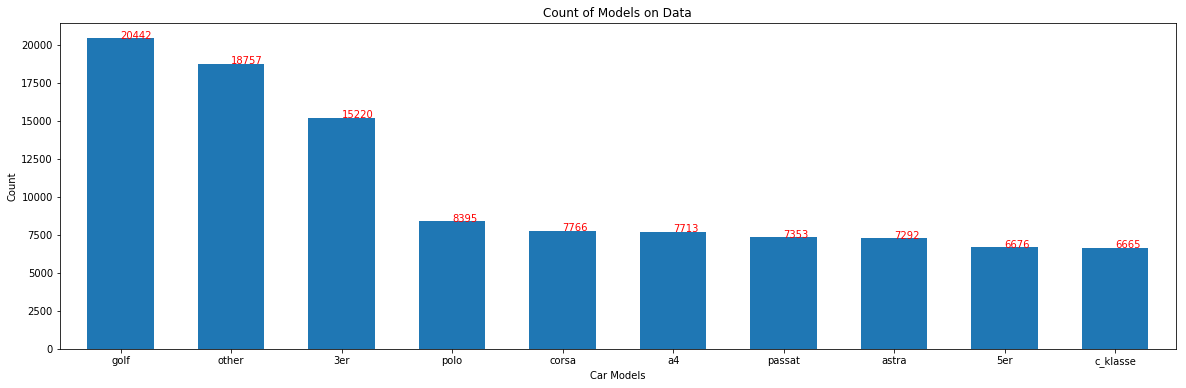

In [26]:
plt.subplots(figsize=[20,6])

ax=dfout.model.value_counts().head(10).plot.bar(width=0.6)

for i, v in dfout.model.value_counts().head(10).reset_index().iterrows():
    ax.text(i, v.model, v.model, color='red')

plt.xticks(rotation='horizontal') #Rotate xticks
plt.xlabel('Car Models')
plt.ylabel('Count')
plt.title('Count of Models on Data')
plt.show()

#### Total number of car models are as shown above. Golf is the most owned car.

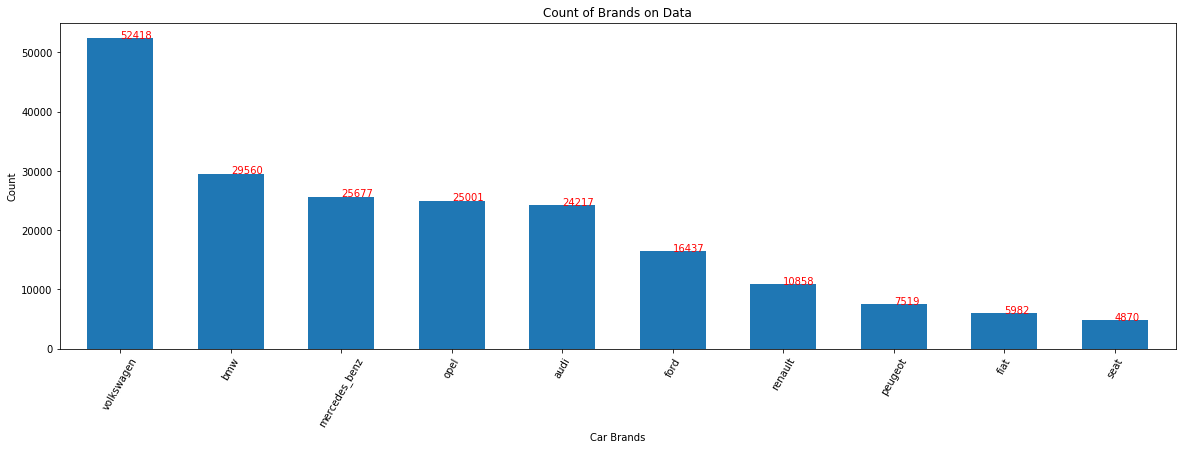

In [27]:
plt.subplots(figsize=[20,6])
ax = dfout.brand.value_counts().head(10).plot.bar(width=0.6)

for i, v in dfout.brand.value_counts().head(10).reset_index().iterrows():
    ax.text(i, v.brand, v.brand, color='red')

plt.xticks(rotation=60) # rotate ticks
plt.xlabel('Car Brands')
plt.ylabel('Count')
plt.title('Count of Brands on Data')
plt.show()

#### When taken a look at the car brands, Volkswagen keep the leading point, and this information is a supportive factor to the 'most owned cars' since golf is the most owned model.

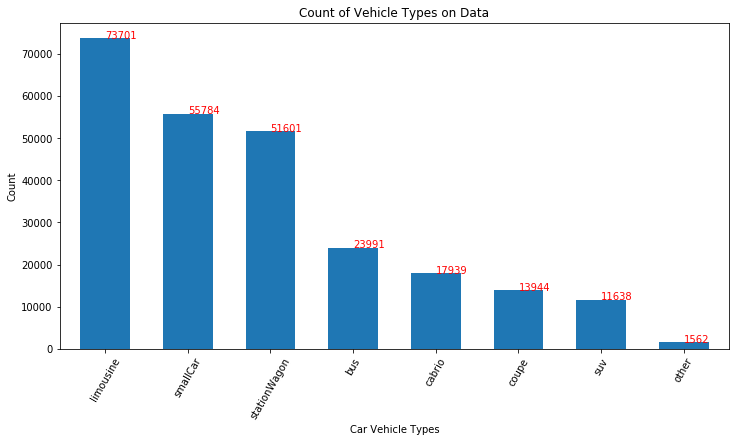

In [28]:
plt.subplots(figsize=[12,6])
ax = dfout.vehicleType.value_counts().plot.bar(width=0.6)
plt.xticks(rotation=15)

for i, v in dfout.vehicleType.value_counts().reset_index().iterrows():
    ax.text(i, v.vehicleType, v.vehicleType, color='red')

plt.xticks(rotation=60) # rotate ticks
plt.xlabel('Car Vehicle Types')
plt.ylabel('Count')
plt.title('Count of Vehicle Types on Data')
plt.show()

#### 'limousine' is the most owned vehicle type because sedan cars are called as limousine in Europe.

## Multivariate Visualisations...

### Visualisations of price by brand

Volkswagen, BMW and Opel are the 3 most posted brands.

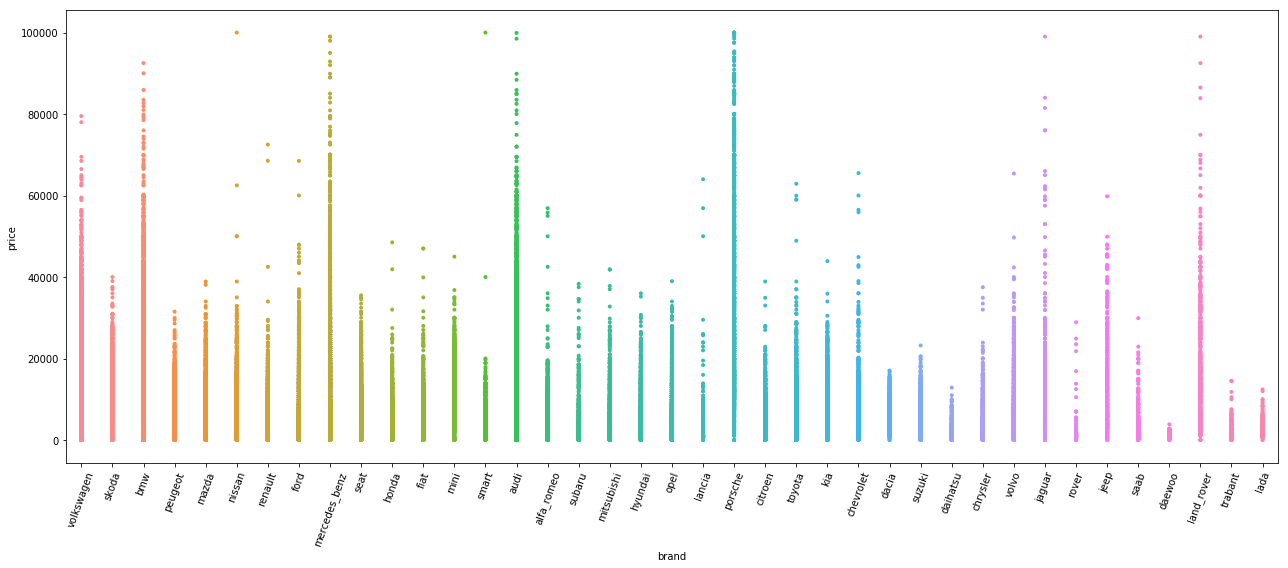

In [29]:

plt.subplots(figsize=[18,8])
sns.stripplot(x='brand',y='price',data=dfout, size=4)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

Despite the fact that we have seen 'Volkswagen' as the most selling car above, BMW is the best selling in terms of 'count' and 'value of the vehicle'.

### Visualsations of price by fuelType

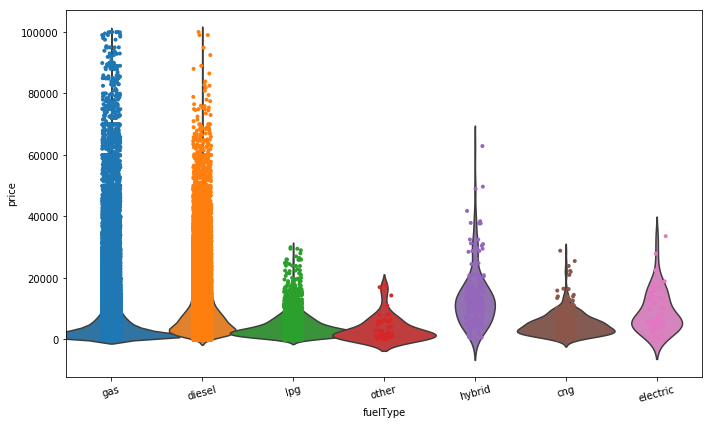

In [30]:
plt.subplots(figsize=[10,6])
sns.violinplot(x='fuelType',y='price',data=dfout,inner=None,width=1.5)
sns.stripplot(x='fuelType',y='price',data=dfout, size=4, jitter=True)
plt.xticks(rotation=15)
plt.tight_layout()


Gas and Diesel are the 2 major ones in terms of price and count.

### The visualisations of prices by gearbox...

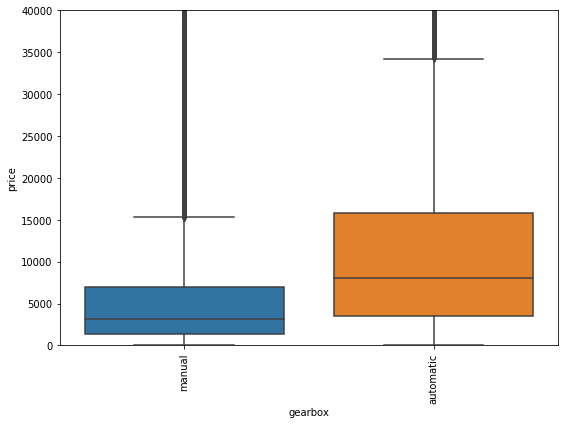

In [31]:
plt.subplots(figsize=(8,6))
sns.boxplot(x='gearbox',y='price',data=dfout)
plt.xticks(rotation=90)
plt.ylim(0,40000)
plt.tight_layout()
plt.show()

### Lets look at the relation between the mileage and the price.

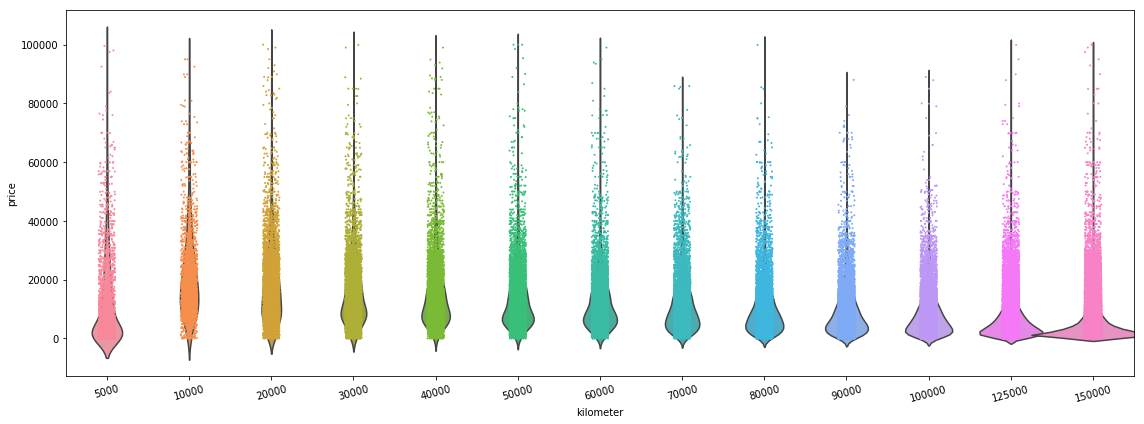

In [32]:
plt.subplots(figsize=[16,6])
sns.violinplot(x='kilometer',y='price',data=dfout,inner=None,width=1.5)
sns.stripplot(x='kilometer',y='price',data=dfout, size=2, jitter=True)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


#### These observations come from the used car sales website. We can observe from the plot above that cars with a mileage of at least 20000 kms are much more advertised for sale than the newer cars. We can infer that people tend to keep their car by the time their cars reach to the mileage of 20000.

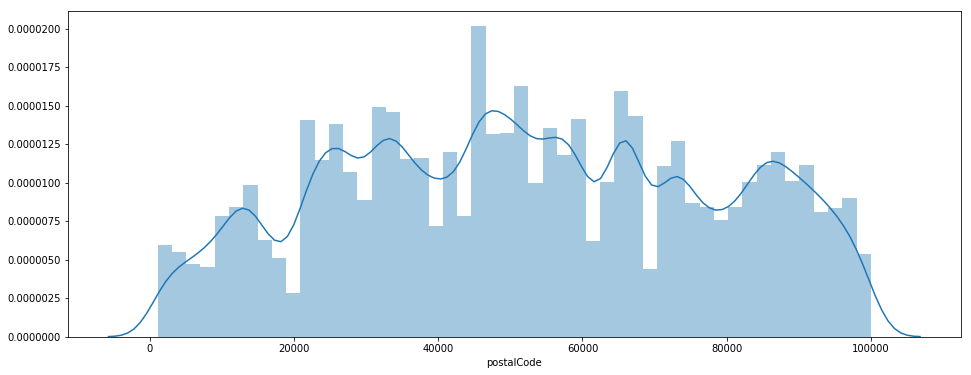

In [33]:
distp,ax = plt.subplots(figsize=(16,6))
ax = sns.distplot(dfout.postalCode)
#distp.show()

Postal code of '45000' is the town that the highest number of cars are loaded into the website for sale

Text(0,0.5,'Price')

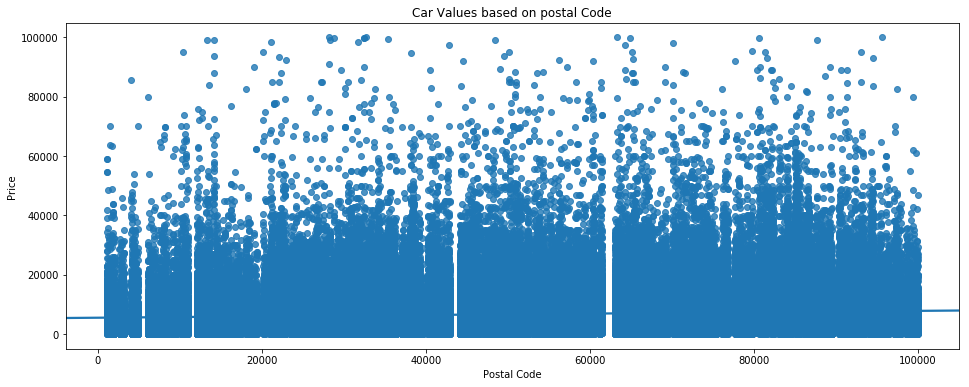

In [34]:
scatter, ax = plt.subplots(figsize=(16,6))
ax = sns.regplot(x='postalCode',y='price',data=dfout)
ax.set_title('Car Values based on postal Code')
ax.set_xlabel('Postal Code')
ax.set_ylabel('Price')

A significant rise is presented on the scatter plot between the 80000 and 85000 numbered postal Codes.

### Visualisation of price by Age

Prices of the cars go down by age. However, some old cars have a high value. I think these cars are classic cars.

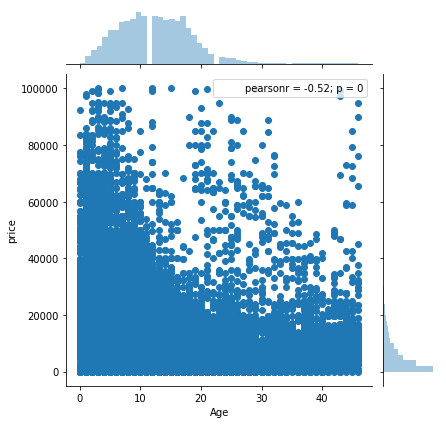

In [35]:
sns.jointplot(x='Age',y='price',data=dfout)

#### Age is one of the most significant factors for sale. Young cars tend to have a higher value compated to the older ones. However, it is obvious that some old cars do have a high selling price because they are classical cars.

In [36]:
dfout[(dfout.Age > 40) & (dfout.price > 40000)].head(10)

,dateCrawled,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,Age
3258,2016-03-30 16:43:31,VW_t2b_westfalia_plus_Haenger_Markise__2._Hand_alles_original,48000,bus,1974,manual,50,transporter,125000,gas,volkswagen,no,2016-03-30,82205,2016-04-07 07:16:00,42
15928,2016-03-18 01:58:06,Porsche_911_Coupe_2_7_schmales_G_Chrommodel,48888,coupe,1974,manual,150,911,150000,gas,porsche,no,2016-03-18,50858,2016-04-07 12:45:57,42
16465,2016-03-30 15:46:00,Jaguar_E_Type,59000,cabrio,1972,automatic,268,other,150000,gas,jaguar,no,2016-03-30,58540,2016-04-05 03:45:20,44
51917,2016-03-22 11:58:18,Mercedes_Benz_280SL_Pagode,89900,cabrio,1970,automatic,170,other,10000,gas,mercedes_benz,no,2016-03-22,80799,2016-04-06 00:46:41,46
62097,2016-03-29 10:25:19,Porsche_911_E_targa,99500,cabrio,1973,manual,165,911,5000,gas,porsche,no,2016-03-29,35394,2016-04-03 09:45:34,43
62785,2016-03-05 14:26:25,Porsche_911,84888,coupe,1971,manual,125,911,150000,gas,porsche,no,2016-03-05,61381,2016-04-06 20:45:45,45
66427,2016-03-07 12:58:28,Ford_Escort_RS_MK1,68500,limousine,1971,manual,179,escort,30000,gas,ford,no,2016-03-07,47249,2016-04-05 20:16:54,45
94735,2016-04-03 12:41:15,Porsche_911_Coupe_2_7_schmales_G_Chrommodel,48888,coupe,1974,manual,150,911,150000,gas,porsche,no,2016-04-03,50858,2016-04-07 14:57:10,42
117554,2016-03-11 11:40:50,Mercedes_Benz_280SE_Coupe_W_111_Flachkuehler._mit_SSD.,79500,coupe,1971,manual,160,other,30000,gas,mercedes_benz,no,2016-03-11,33699,2016-04-07 01:45:12,45
142493,2016-04-01 19:38:15,Alfa_Romeo_Montreal_V8_No_GTC_Spider_Veloce,49999,coupe,1974,manual,200,other,100000,gas,alfa_romeo,no,2016-04-01,22609,2016-04-05 15:44:53,42


### Correlation Map

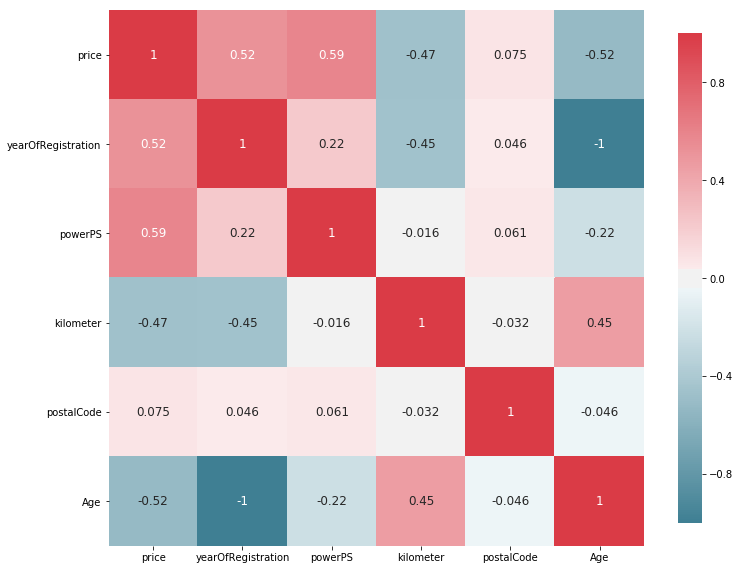

In [37]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(dfout)


# ML Linear Regression

In [38]:
print(dfout.columns)
print(dfout.info())
NumericCols = ['price', 'yearOfRegistration','powerPS', 'kilometer','postalCode','Age']

Index(['dateCrawled', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen', 'Age'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 250160 entries, 3 to 371527
Data columns (total 16 columns):
dateCrawled           250160 non-null object
name                  250160 non-null object
price                 250160 non-null int64
vehicleType           250160 non-null object
yearOfRegistration    250160 non-null int64
gearbox               250160 non-null object
powerPS               250160 non-null int64
model                 250160 non-null object
kilometer             250160 non-null int64
fuelType              250160 non-null object
brand                 250160 non-null object
notRepairedDamage     250160 non-null object
dateCreated           250160 non-null datetime64[ns]
postalCode            250160 non-null int64
lastSeen 

In [39]:
from sklearn.cross_validation import train_test_split
df_Numeric = dfout[NumericCols]
print(df_Numeric.columns)
X_train, X_test, y_train, y_test = train_test_split(df_Numeric.drop('price',axis=1), 
                                                    df_Numeric.price, test_size = 0.3, random_state=42)

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'postalCode',
       'Age'],
      dtype='object')


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### I had to drop the non-numeric feature as well as target feature.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import time


Linreg = LinearRegression()

Linreg.fit(X_train, y_train)

print(Linreg.score(X_test,y_test))

0.604833727313


In [58]:
print('Estimated intercept coefficient: {}'.format(Linreg.intercept_))
print('Number of coefficients: {}'.format(len(Linreg.coef_)))
pd.DataFrame({'features': X_train.columns, 'estimatedCoefficients': Linreg.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: 1145472.969000895
Number of coefficients: 5


,features,estimatedCoefficients
0,yearOfRegistration,-563.200060
1,powerPS,68.755415
2,kilometer,-0.069455
3,postalCode,0.006336
4,Age,-883.137316


In [64]:
from sklearn.metrics import r2_score, mean_squared_error

RSquaredValue = r2_score(y_test, Linreg.predict(X_test))
MeanSquaredError = mean_squared_error(y_test,Linreg.predict(X_test))
print('R-Squared Value Of Linear Regression:',RSquaredValue)
print('Mean Squared Value of Linear Regression: ',MeanSquaredError)

R-Squared Value Of Linear Regression: 0.604833727313
Mean Squared Value of Linear Regression:  25410123.9382


In [44]:
import statsmodels.formula.api as smf

model = smf.ols(formula='price ~ yearOfRegistration + powerPS + kilometer + postalCode + Age',data=df_Numeric).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                 7.747e+04
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:08:26   Log-Likelihood:            -2.4845e+06
No. Observations:              250160   AIC:                         4.969e+06
Df Residuals:                  250154   BIC:                         4.969e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.066e+06   2.05

Text(0.5,1,'Relationship of Fitted and Original Values')

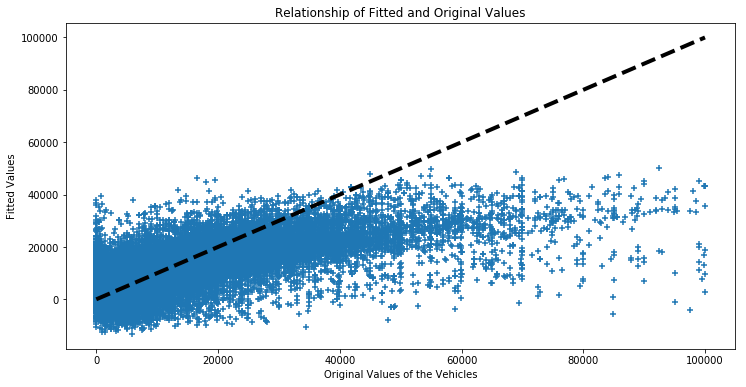

In [90]:
fig,ax = plt.subplots(figsize=(12,6))
ax.scatter(df_Numeric.price,model.fittedvalues,marker='+')
ax.plot([df_Numeric.price.min(),df_Numeric.price.max()],[df_Numeric.price.min(),df_Numeric.price.max()],'k--',lw=4)
ax.set_ylabel('Fitted Values')
ax.set_xlabel('Original Values of the Vehicles')
ax.set_title('Relationship of Fitted and Original Values')

In [45]:
reg = LinearRegression()

cv_res = cross_val_score(reg, df_Numeric.drop('price',axis=1),df_Numeric.price,cv=5)

reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
y_pred = reg.predict(X_test)

print(reg.score(X_test,y_test),'\n')

print('Results of Cross-Validation:',cv_res)
#reg.accuracy(y_test,y_pred)

print('\nBest score after cross-validation : 0.613')

0.604833727313 

Results of Cross-Validation: [ 0.61099144  0.60395055  0.61364249  0.60663933  0.60279803]

Best score after cross-validation : 0.613


In [67]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.1,normalize=True)

ridge.fit(X_train,y_train)

ridge.score(X_test,y_test)

RSquaredValue = r2_score(y_test, ridge.predict(X_test))
MeanSquaredError = mean_squared_error(y_test,ridge.predict(X_test))
print('R-Squared Value :',RSquaredValue)
print('Mean Squared Value: ',MeanSquaredError)

R-Squared Value : 0.6006027233
Mean Squared Value:  25682187.4815


In [68]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.1,normalize=True)

lasso.fit(X_train,y_train)

lasso.score(X_test,y_test)

RSquaredValue = r2_score(y_test, lasso.predict(X_test))
MeanSquaredError = mean_squared_error(y_test,lasso.predict(X_test))
print('R-Squared Value :',RSquaredValue)
print('Mean Squared Value: ',MeanSquaredError)

R-Squared Value : 0.604724543953
Mean Squared Value:  25417144.6858


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
 

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('LR', LinearRegression()))
pipeline = Pipeline(estimators)

pipeline.fit(X_train,y_train)

pipeline.score(X_test,y_test)

RSquaredValue = r2_score(y_test, pipeline.predict(X_test))
MeanSquaredError = mean_squared_error(y_test,pipeline.predict(X_test))
print('R-Squared Value :',RSquaredValue)
print('Mean Squared Value: ',MeanSquaredError)

R-Squared Value : 0.604833727313
Mean Squared Value:  25410123.9382


In [50]:
#mylist = list(dfout.select_dtypes(include=['object']).columns)
#mylist.pop();mylist.pop()
#print(mylist)

# name Column has 142619 unique values.
NonNumericCols = ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand',
       'notRepairedDamage']
# Create a copy of DataFrame with NonNumeric Columns
df_NonNumeric = dfout[NonNumericCols]

# get dummies for NonNumeric Columns
dummy = pd.get_dummies(df_NonNumeric)

dfWithDummy = pd.concat([df_Numeric,dummy], axis =1)
dfWithDummy.head(10)

,price,yearOfRegistration,powerPS,kilometer,postalCode,Age,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_no,notRepairedDamage_yes
3,1500,2001,75,150000,91074,15,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,3600,2008,69,90000,60437,8,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,650,1995,102,150000,33775,21,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,2200,2004,109,150000,67112,12,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,1980,50,40000,19348,36,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
10,2000,2004,105,150000,96224,12,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
11,2799,2005,140,150000,57290,11,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
14,17999,2011,190,70000,4177,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17,1750,2004,75,150000,65599,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18,7550,2007,136,150000,88361,9,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
for col in df_NonNumeric.columns:
    print(str.upper(col),' ', df_NonNumeric[col].nunique())

VEHICLETYPE   8
GEARBOX   2
MODEL   250
FUELTYPE   7
BRAND   39
NOTREPAIREDDAMAGE   2


In [78]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(dfWithDummy.drop('price',axis=1), 
                                                        dfWithDummy.price, test_size = 0.3, random_state=42)

Linreg = LinearRegression()

Linreg.fit(X_trainN, y_trainN)

#print(Linreg.score(X_testN,y_testN))

RSquaredValue = r2_score(y_testN, Linreg.predict(X_testN))
MeanSquaredError = mean_squared_error(y_testN,Linreg.predict(X_testN))
print('R-Squared Value :',RSquaredValue)
print('Mean Squared Value: ',MeanSquaredError)

0.736835084661
R-Squared Value : 0.736835084661
Mean Squared Value:  16922125.1335


In [81]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.1,normalize=True)

ridge.fit(X_trainN,y_trainN)

RSquaredValue = r2_score(y_testN, ridge.predict(X_testN))
MeanSquaredError = mean_squared_error(y_testN,ridge.predict(X_testN))
print('R-Squared Value :',RSquaredValue)
print('Mean Squared Value: ',MeanSquaredError)

R-Squared Value : 0.731854510049
Mean Squared Value:  17242387.8353


In [82]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.1,normalize=True)

lasso.fit(X_trainN,y_trainN)

RSquaredValue = r2_score(y_testN, lasso.predict(X_testN))
MeanSquaredError = mean_squared_error(y_testN,lasso.predict(X_testN))
print('R-Squared Value :',RSquaredValue)
print('Mean Squared Value: ',MeanSquaredError)

R-Squared Value : 0.728976965968
Mean Squared Value:  17427420.7108


In [80]:
cv_resDummy = cross_val_score(Linreg, dfWithDummy.drop('price',axis=1),dfWithDummy.price,cv=5)

print('Cross Validation Scores With Dummies:',cv_resDummy)

Cross Validation Scores With Dummies: [ 0.74238841  0.73577361  0.74574299  0.74031939  0.74409267]


Best score after Cross Validation is 0.745

### Random Forest Regression

In [91]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100,random_state=0)

forest.fit(X_train,y_train)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))

RSquaredValue = r2_score(y_test, forest.predict(X_test))
MeanSquaredError = mean_squared_error(y_test,forest.predict(X_test))
print('R-Squared Value :',RSquaredValue)
print('Mean Squared Value: ',MeanSquaredError)

Accuracy on the training subset: 0.973
Accuracy on the test subset: 0.804
R-Squared Value : 0.804160991899
Mean Squared Value:  12592910.4069


In [92]:
forest.fit(X_trainN,y_trainN)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_trainN, y_trainN)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_testN, y_testN)))

RSquaredValue = r2_score(y_testN, forest.predict(X_testN))
MeanSquaredError = mean_squared_error(y_testN,forest.predict(X_testN))
print('R-Squared Value :',RSquaredValue)
print('Mean Squared Value: ',MeanSquaredError)

Accuracy on the training subset: 0.986
Accuracy on the test subset: 0.899
R-Squared Value : 0.899070707067
Mean Squared Value:  6489991.73177


In [74]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]} # 200-300
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, verbose=1)
gs = gs.fit(X_trainN, y_trainN)

print(gs.best_score_)
print(gs.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 207.3min finished


0.862948849324
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [75]:
print(gs.best_score_)
print(gs.best_params_)

0.862948849324
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}
